In [36]:
import glob

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [38]:
date = 20240111
stn_num = 2

path_ctd = '/Users/ramajem/Documents/zug_ctd/data/APhys/VerticalProfiles/{}_CTD/L1/'.format(date)
path_grid = '/Users/ramajem/Documents/mitgcm/data/input_mitgcm/'

Loading temperature profile from CTD
- start with stratified summer? Or unstratified winter?
- which one is more stable? and less likely to cause instabilities 
- picking a station in  the south basin


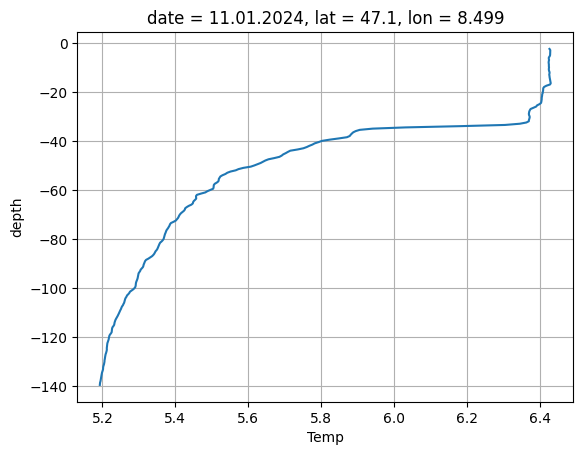

In [39]:
fname_ctd = path_ctd + '*' + str(stn_num) + '.nc'
fname_ctd = glob.glob(fname_ctd)[0]
data = xr.open_dataset(fname_ctd)

T = data.Temp
T.plot(y='depth')
plt.grid()

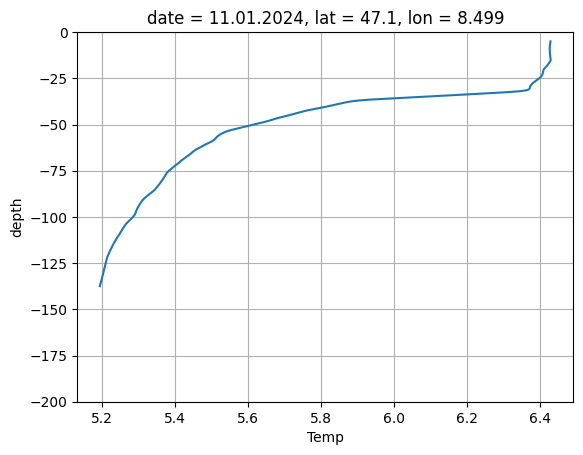

In [43]:
# smooth out temperature profile so that it does not cause any instabilities 
T_smooth = T.rolling(depth=10, center=True).mean()
T_smooth.plot(y='depth')
plt.ylim(-200,0)
plt.grid()

Load grid data and interpolate/replicate over new grid

(-200.0, 0.0)

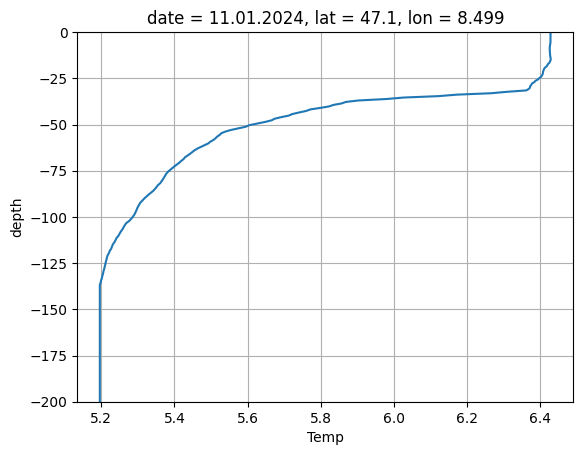

In [46]:
x  = np.loadtxt(path_grid + 'x.txt', delimiter=',')
y = np.loadtxt(path_grid + 'y.txt', delimiter=',')
z = np.loadtxt(path_grid + 'z.txt', delimiter=',')

T_interp = T_smooth.interp(depth=z, method='nearest')

# Check for NaN values and replace them with the nearest non-NaN value
if T_interp.isnull().any():
    T_interp = T_interp.ffill(dim='depth').bfill(dim='depth')

T_interp.plot(y='depth')
plt.grid()
plt.ylim(-200,0)


In [45]:
T_rep = np.tile(T_interp, (len(x), len(y), 1))
T_rep = xr.DataArray(T_rep, coords=[x, y, z], dims=['X', 'Y', 'Z'])
